## Importing dataset & Libraries

In [ ]:

import os
import re
import shutil
import string
import tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras import layers
from tensorflow.keras import losses

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"anjaliyadav23","key":"f5ab288d5c9158eb4870d43149717d3d"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d uciml/sms-spam-collection-dataset

sms-spam-collection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip sms-spam-collection-dataset.zip

Archive:  sms-spam-collection-dataset.zip
replace spam.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: spam.csv                


In [ ]:
df=pd.read_csv('spam.csv', encoding="ISO-8859-1")

In [ ]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df = df[['v1','v2']]

In [ ]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df['label'] = df['v1']
df['Text']=df['v2']

<ipython-input-35-cf3b1058388d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['v1']
<ipython-input-35-cf3b1058388d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text']=df['v2']


In [ ]:
df=df[['label','Text']]

In [ ]:
df

,label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   Text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


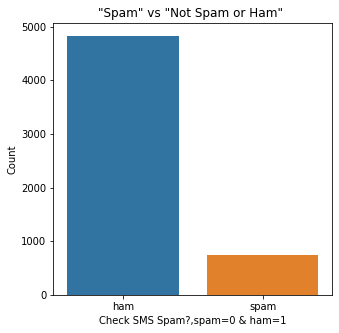

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='label', data=df)
plt.title('"Spam" vs "Not Spam or Ham" ')
p = plt.xlabel('Check SMS Spam?,spam=0 & ham=1')
p = plt.ylabel('Count')

In [ ]:
df['label'] = df['label'].replace(['ham', 'spam'], [0, 1])

<ipython-input-52-50c38ce7a001>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].replace(['ham', 'spam'], [0, 1])


In [ ]:
df = df.drop_duplicates()
df.groupby('label').describe()

Text                                                               
      count unique                                                top freq
label                                                                     
0      4516   4516  Go until jurong point, crazy.. Available only ...    1
1       653    653  Free entry in 2 a wkly comp to win FA Cup fina...    1

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stop_words(text):
    text = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word.isalpha() and not word in stop_words]
    return ' '.join(text)
    
x = df.apply(lambda row: remove_stop_words(row['Text']), axis=1)
y = df['label']

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

max_words = 20000
max_length = 500

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x)
sequences = tokenizer.texts_to_sequences(x)
x = pad_sequences(sequences, maxlen=max_length)

In [ ]:
x

array([[   0,    0,    0, ...,   10, 3294,   55],
       [   0,    0,    0, ...,  295,    1, 1451],
       [   0,    0,    0, ...,  405,   56,  306],
       ...,
       [   0,    0,    0, ..., 7154, 1425, 7155],
       [   0,    0,    0, ...,  740,  116,    8],
       [   0,    0,    0, ..., 2007,  399,  177]], dtype=int32)

In [ ]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5169, dtype: int64

## Training model

We create a neural network containing an Embedding layer for converting sequences into arrays of word vectors and a Dense layer for classifying arrays of word vectors.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Embedding


model = Sequential() 
model.add(Embedding(max_words, 32, input_length=max_length)) 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Compiling the model

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 32)           640000    
                                                                 
 flatten_2 (Flatten)         (None, 16000)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               2048128   
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,688,257
Trainable params: 2,688,257
Non-trainable params: 0
_________________________________________________________________


## Fitting of the model

In [ ]:
#!pip install tensorflow==2.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
hist = model.fit(x, y, validation_split=0.2, epochs=5, batch_size=20)

Epoch 1/5
207/207 [==============================] - 8s 35ms/step - loss: 0.2357 - accuracy: 0.9190 - val_loss: 0.0750 - val_accuracy: 0.9807
Epoch 2/5
207/207 [==============================] - 10s 48ms/step - loss: 0.0451 - accuracy: 0.9862 - val_loss: 0.0666 - val_accuracy: 0.9787
Epoch 3/5
207/207 [==============================] - 12s 56ms/step - loss: 0.0185 - accuracy: 0.9954 - val_loss: 0.0625 - val_accuracy: 0.9807
Epoch 4/5
207/207 [==============================] - 11s 54ms/step - loss: 0.0092 - accuracy: 0.9981 - val_loss: 0.0684 - val_accuracy: 0.9778
Epoch 5/5
207/207 [==============================] - 9s 46ms/step - loss: 0.0062 - accuracy: 0.9985 - val_loss: 0.0745 - val_accuracy: 0.9787


[]

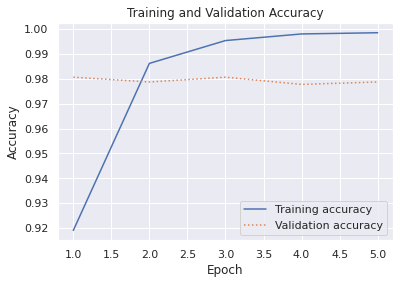

In [ ]:
%matplotlib inline
sns.set()

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

## Testing the model with some messages

In [ ]:
cleaned_text = remove_stop_words('Can you attend the presentation on Wednesdsay? Need to Need to take my pet to the vet.')
sequence = tokenizer.texts_to_sequences([cleaned_text])
padded_sequence = pad_sequences(sequence, maxlen=max_length)
model.predict(padded_sequence)[0][0]

0.0011176169

In [ ]:
cleaned_text = remove_stop_words('Why pay more for education when you can get it for free')
sequence = tokenizer.texts_to_sequences([cleaned_text])
padded_sequence = pad_sequences(sequence, maxlen=max_length)
model.predict(padded_sequence)[0][0]

0.0061142445